# 2023-02-20

# Supervised Learning

## Regression

In [14]:
!pip install scikit-learn --upgrade


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [29]:
# 최종적으로 주택 가격을 예측하려 할 때 (Target variable : MEDV)

df = pd.read_csv('load_boston.csv').drop(['Unnamed: 0'], axis=1)    # pd.read_csv('load_boston.csv', index_col = 0)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [40]:
# step 1 / input variable, target variable 나누기

# input variable
X = df.drop(['MEDV'], axis = 1)
# output variable
y = df['MEDV']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [38]:
# step 2 / train, test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1004)   # test_size = 0.2 -> 20프로를 test데이터로 (보통 test_size는 8:2, 7:3정도) 

In [41]:
print(X_train.shape)    # 학습할 데이터
print(X_test.shape)
print(y_train.shape)    # 학습할 데이터
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [42]:
# step 3 / model train (LinearRegression)

model = LinearRegression()
model.fit(X_train, y_train)               # 학습

LinearRegression()

In [43]:
model.coef_            # 기울기

array([-8.31250759e-02,  5.04950616e-02, -3.96534069e-04,  3.44424430e+00,
       -1.35226625e+01,  3.54788012e+00,  1.25855871e-03, -1.47501679e+00,
        3.12079206e-01, -1.15933807e-02, -9.20011566e-01,  1.13992300e-02,
       -5.88706540e-01])

In [44]:
model.intercept_               # 절편

35.070833731919436

In [47]:
# step 4 / predict

model_prediction = model.predict(X_test)

In [48]:
# step 5 / evaluate (모델 평가) - mean_squared_error

mean_squared_error(y_test, model_prediction)    # 숫자가 적을수록 좋은 모델 

19.45026734137346

## Classification

In [49]:
from sklearn.datasets import load_iris
import pandas as pd

In [76]:
iris_data = load_iris()

In [77]:
X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
y = pd.DataFrame(iris_data.target, columns = ['class'])
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [78]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [79]:
# train과 test데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1004)

In [80]:
# 모델 생성
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
# Predict

prediction = model.predict(X_test)

In [82]:
# evaluate (모델 평가) - 모델을 만든 후 score(X_test, y_test)를 활용해 Accuracy를 구함

model.score(X_test, y_test)    # 테스트 정확도   

0.9666666666666667

In [83]:
model.score(X_train, y_train)  # 훈련 정확도

1.0

In [84]:
# 모델이 학습을 할 때 중요하게 생각한 feature

importance = model.feature_importances_
importance

array([0.        , 0.01667014, 0.91155217, 0.07177769])

<BarContainer object of 4 artists>

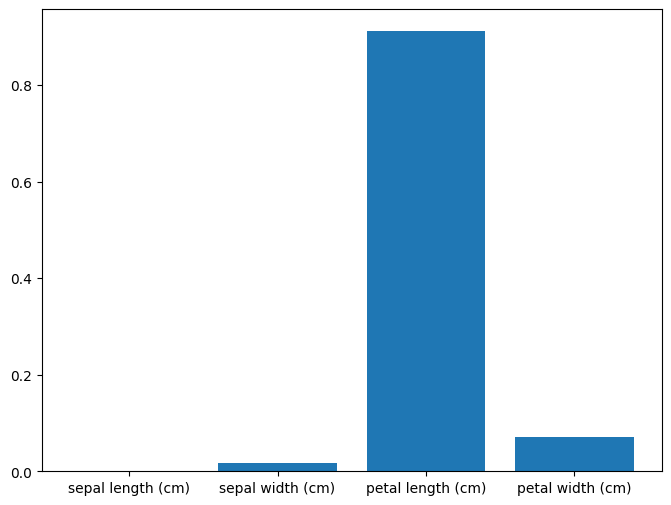

In [85]:
# 위 importance 시각화

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.bar(X.columns, importance)

## [실습]

In [86]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import pandas as pd

cancer_data = load_breast_cancer()

input_data = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names) # input data
target_data = pd.DataFrame(cancer_data.target, columns=['class']) # target data

In [103]:
input_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [87]:
# Train 데이터와 Test데이터 분리

X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size = 0.2, random_state = 1004)

In [111]:
# Decision Tree model을 만들때 들어갈 수 있는 파라미터

model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [196]:
cancer_model = DecisionTreeClassifier(max_depth = 5)    # 최대 깊이를 5로 제한
cancer_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [197]:
prediction = cancer_model.predict(X_test)

In [198]:
cancer_model.score(X_train, y_train)   # 훈련정확도

0.9956043956043956

In [199]:
cancer_model.score(X_test, y_test)    # test정확도

0.9298245614035088

In [147]:
importance_1 = cancer_model.feature_importances_

([<matplotlib.patches.Wedge at 0x1f745a0fb50>,
 [Text(1.1, 0.0, ''),
  Text(1.0859533413579259, 0.17522939363461898, ''),
  Text(1.0441721083753523, 0.3459835373120686, ''),
  Text(1.0441721083753523, 0.3459835373120686, ''),
  Text(1.0441721083753523, 0.3459835373120686, ''),
  Text(1.0351355305000554, 0.3721484025175563, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0254434296004704, 0.3980775963166297, ''),
  Text(1.0140323279540253, 0.4263079143813078, ''),
  Text(0.9881282265846691, 0.48332453675210507

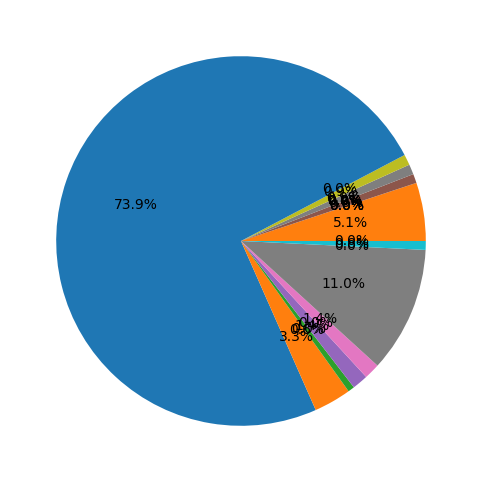

In [146]:
plt.figure(figsize=(16, 6))
plt.pie(importance_1, autopct='%.1f%%')

C:\Users\GM220808\AppData\Local\Temp\ipykernel_9848\2227228814.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


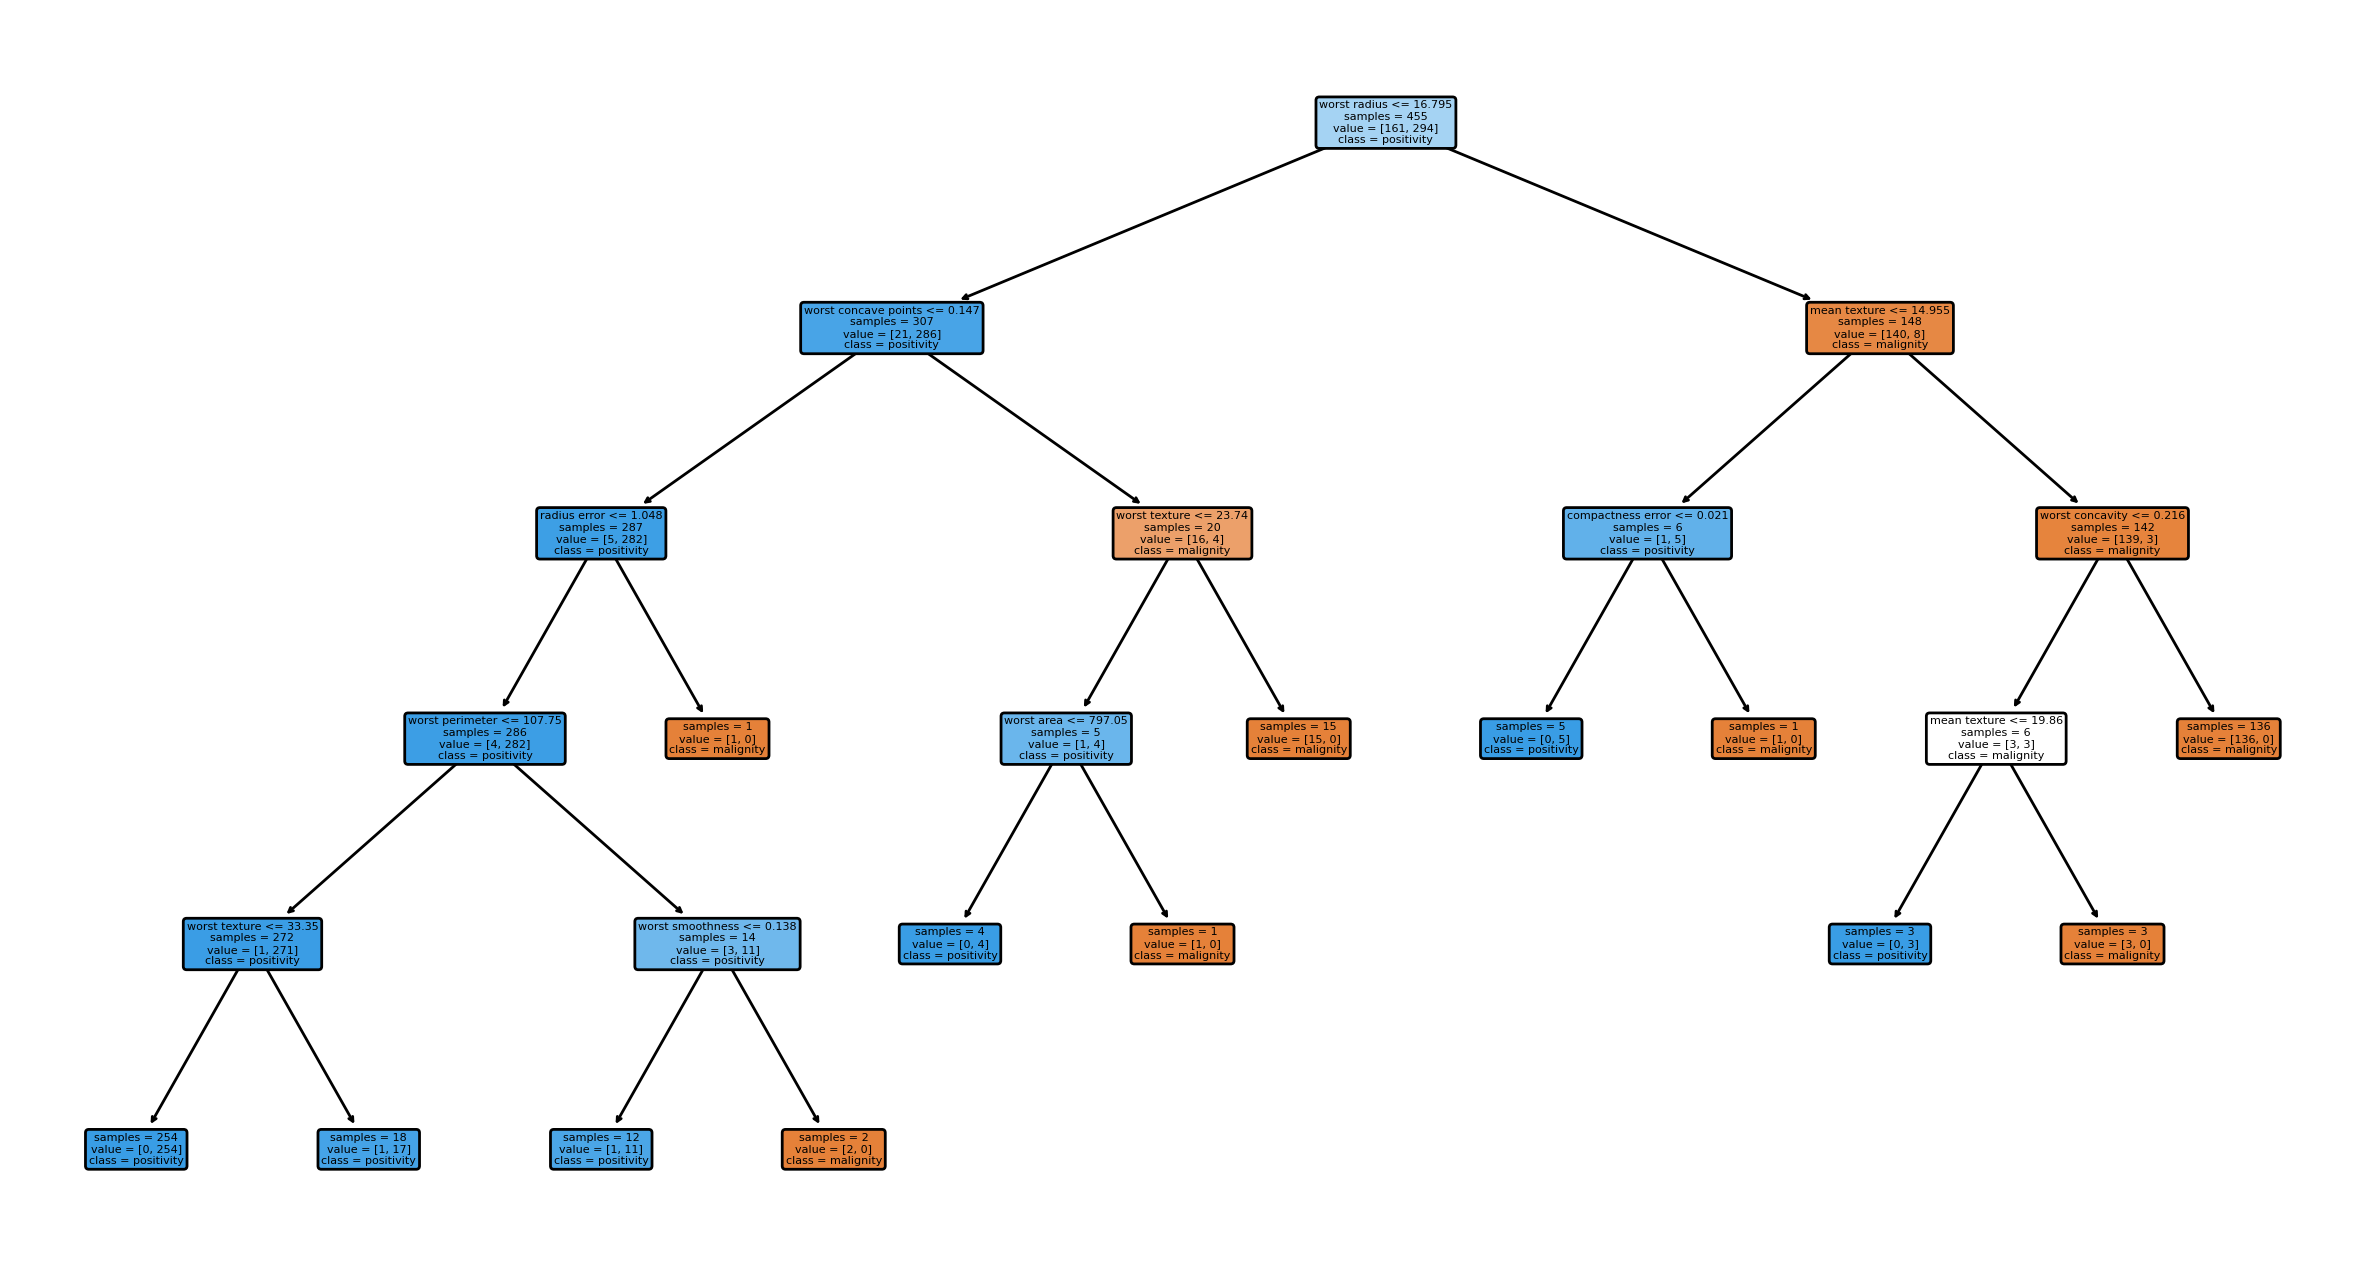

In [201]:
# Decision tree 시각화

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(cancer_model, class_names=["malignity", "positivity"], feature_names=cancer_data.feature_names,
         impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()

## 스케일 변환

In [203]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)     # input data
y = pd.DataFrame(cancer_data.target, columns=['class'])                   # target data

In [206]:
# 훈련 데이터와 테스트 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size = 0.2, random_state = 1004)

In [205]:
# minmax scaler

from sklearn.preprocessing import MinMaxScaler

In [207]:
# X_train데이터를 scaling

scaler = MinMaxScaler()
scaler.fit(X_train)           # X_train의 max, min값을 추출하는 과정

MinMaxScaler()

In [213]:
# X_train기준으로 scaler를 만들고 그 scaler에 X_train을 transform 해줌

X_train_scaled = scaler.transform(X_train)         # 위에서 추출한 max, min값을 가지고 transform하여 X_train_scaled 변수에 대입
print('스케일 변환 전 모양:', X_train.shape)
print('스케일 변환 후 모양:', X_train_scaled.shape)
print('스케일 변환 전 최솟값:\n', X_train.min(axis=0))
print('스케일 변환 전 최대값:\n', X_train.max(axis=0))
print('스케일 변환 후 최솟값:\n', X_train_scaled.min(axis=0))
print('스케일 변환 후 최대값:\n', X_train_scaled.max(axis=0))

스케일 변환 전 모양: (455, 30)
스케일 변환 후 모양: (455, 30)
스케일 변환 전 최솟값:
 mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.771400
area error                   7.228000
smoothness error             0.002826
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness           

In [215]:
# test데이터의 scale변환

X_test_scaled = scaler.transform(X_test)
print('스케일 변환 후 최솟값:\n', X_test_scaled.min(axis=0))
print('스케일 변환 후 최대값:\n', X_test_scaled.max(axis=0))

스케일 변환 후 최솟값:
 [ 0.07747645  0.0226581   0.07290443  0.03435843  0.1185339   0.01245322
  0.          0.          0.08080808  0.01010952  0.00137606  0.00053736
 -0.00067897 -0.0007963  -0.03932306  0.01846817  0.          0.
  0.0374008   0.01052574  0.05610103  0.09008529  0.04726331  0.02204581
 -0.07349617 -0.00686738  0.          0.          0.02897694  0.02407189]
스케일 변환 후 최대값:
 [0.9578778  0.71051742 0.95577362 0.89353128 0.71923806 0.89571192
 0.96251172 0.9333996  0.81717172 0.90564448 0.42748506 1.27971039
 0.44079289 0.29323404 0.51349633 0.70303722 1.30348914 1.29070905
 0.68100974 1.31777539 0.89612238 0.82009595 0.84859804 0.74488793
 1.03062341 0.73986011 0.93450479 0.92371134 0.82968658 0.56316411]


## 스케일 변환 2

In [216]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd


cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)     # input data
y = pd.DataFrame(cancer_data.target, columns=['class'])                   # target data

In [217]:
X_train, X_test, y_train, y_test = train_test_split(input_data, target_data, test_size = 0.2, random_state = 1004)

In [220]:
# fit과 transform을 한번에 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)          # scaler를 X_train에 fitting
print('스케일 변환 전 모양:', X_train.shape)
print('스케일 변환 후 모양:', X_train_scaled.shape)
print('스케일 변환 전 최솟값:\n', X_train.min(axis=0))
print('스케일 변환 전 최대값:\n', X_train.max(axis=0))
print('스케일 변환 후 최솟값:\n', X_train_scaled.min(axis=0))
print('스케일 변환 후 최대값:\n', X_train_scaled.max(axis=0))

스케일 변환 전 모양: (455, 30)
스케일 변환 후 모양: (455, 30)
스케일 변환 전 최솟값:
 mean radius                  6.981000
mean texture                 9.710000
mean perimeter              43.790000
mean area                  143.500000
mean smoothness              0.052630
mean compactness             0.019380
mean concavity               0.000000
mean concave points          0.000000
mean symmetry                0.106000
mean fractal dimension       0.049960
radius error                 0.111500
texture error                0.360200
perimeter error              0.771400
area error                   7.228000
smoothness error             0.002826
compactness error            0.002252
concavity error              0.000000
concave points error         0.000000
symmetry error               0.007882
fractal dimension error      0.000895
worst radius                 7.930000
worst texture               12.020000
worst perimeter             50.410000
worst area                 185.200000
worst smoothness           

In [222]:
X_test_scaled = scaler.transform(X_test)      # X_test에 적용할 땐 transform만 사용
print('스케일 변환 후 최솟값:\n', X_test_scaled.min(axis=0))
print('스케일 변환 후 최대값:\n', X_test_scaled.max(axis=0))

스케일 변환 후 최솟값:
 [ 0.07747645  0.0226581   0.07290443  0.03435843  0.1185339   0.01245322
  0.          0.          0.08080808  0.01010952  0.00137606  0.00053736
 -0.00067897 -0.0007963  -0.03932306  0.01846817  0.          0.
  0.0374008   0.01052574  0.05610103  0.09008529  0.04726331  0.02204581
 -0.07349617 -0.00686738  0.          0.          0.02897694  0.02407189]
스케일 변환 후 최대값:
 [0.9578778  0.71051742 0.95577362 0.89353128 0.71923806 0.89571192
 0.96251172 0.9333996  0.81717172 0.90564448 0.42748506 1.27971039
 0.44079289 0.29323404 0.51349633 0.70303722 1.30348914 1.29070905
 0.68100974 1.31777539 0.89612238 0.82009595 0.84859804 0.74488793
 1.03062341 0.73986011 0.93450479 0.92371134 0.82968658 0.56316411]


### [실습]

In [250]:
# scaled된 데이터로 모델을 만들고

cancer_model1 = DecisionTreeClassifier(max_depth = 5)    # 최대 깊이를 5로 제한
cancer_model1.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=5)

In [248]:
cancer_model1.score(X_train_scaled, y_train)

0.9956043956043956

In [249]:
cancer_model1.score(X_test_scaled, y_test)

0.9298245614035088